<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 4 - Generate Descriptive Statistics and Visualizations

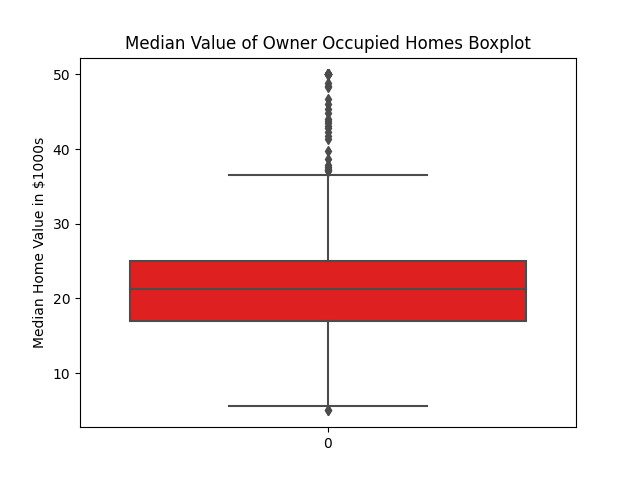

In [6]:
ax = sns.boxplot(data = boston_df['MEDV'], color = 'red') 
plt.title('Median Value of Owner Occupied Homes Boxplot')
plt.ylabel('Median Home Value in $1000s')
plt.show()

### We can see that the first quartile of the median value of owner occupied homes is around 17K, with a median around 21K, and the third quartile is around 25k, with some outliers. The max median value is 50K.

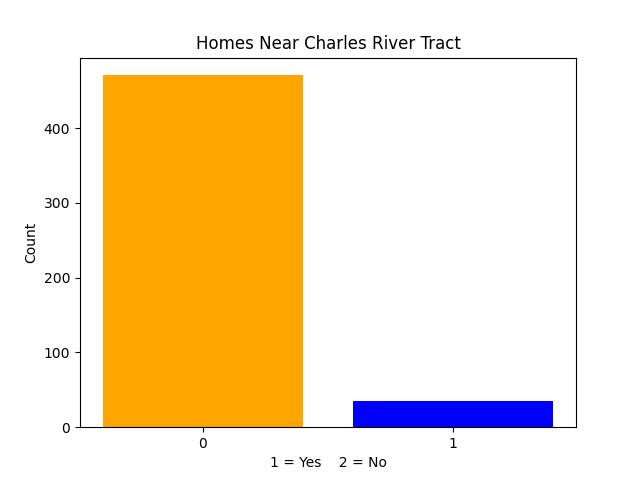

In [7]:
x = boston_df.CHAS.unique()
y = boston_df.CHAS.value_counts()
plt.bar(x, y, color=['orange','blue'])
plt.title('Homes Near Charles River Tract')
plt.xlabel('1 = Yes    2 = No')
plt.xticks([0, 1])
plt.ylabel('Count')
plt.show()

### The majority of houses are not near a tract of the Charles River

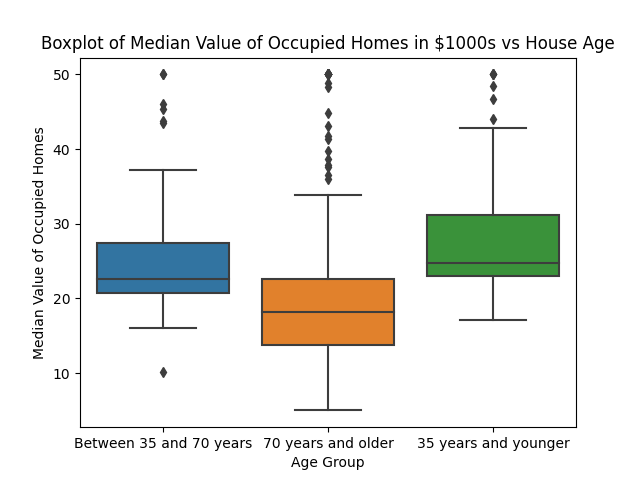

In [8]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
sns.boxplot(x='age_group',
            y='MEDV',
            data=boston_df)
plt.title('Boxplot of Median Value of Occupied Homes in $1000s vs House Age')
plt.ylabel('Median Value of Occupied Homes')
plt.xlabel('Age Group')
plt.show()

### We can see the mean and median of occupied house prices increases when its age decreases.

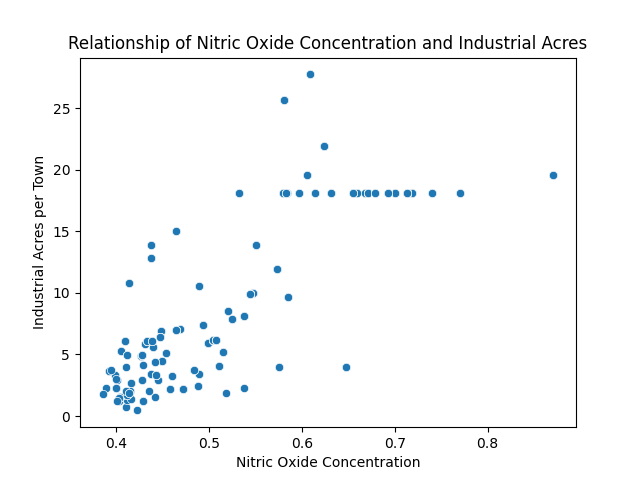

In [9]:
sns.scatterplot(x = 'NOX',
                y= 'INDUS',
                data= boston_df)
plt.title('Relationship of Nitric Oxide Concentration and Industrial Acres')
plt.ylabel('Industrial Acres per Town')
plt.xlabel('Nitric Oxide Concentration')
plt.show()

### We can see there is a linear correlation between levels of Nitric Oxide concentration and Industrial acres per town.

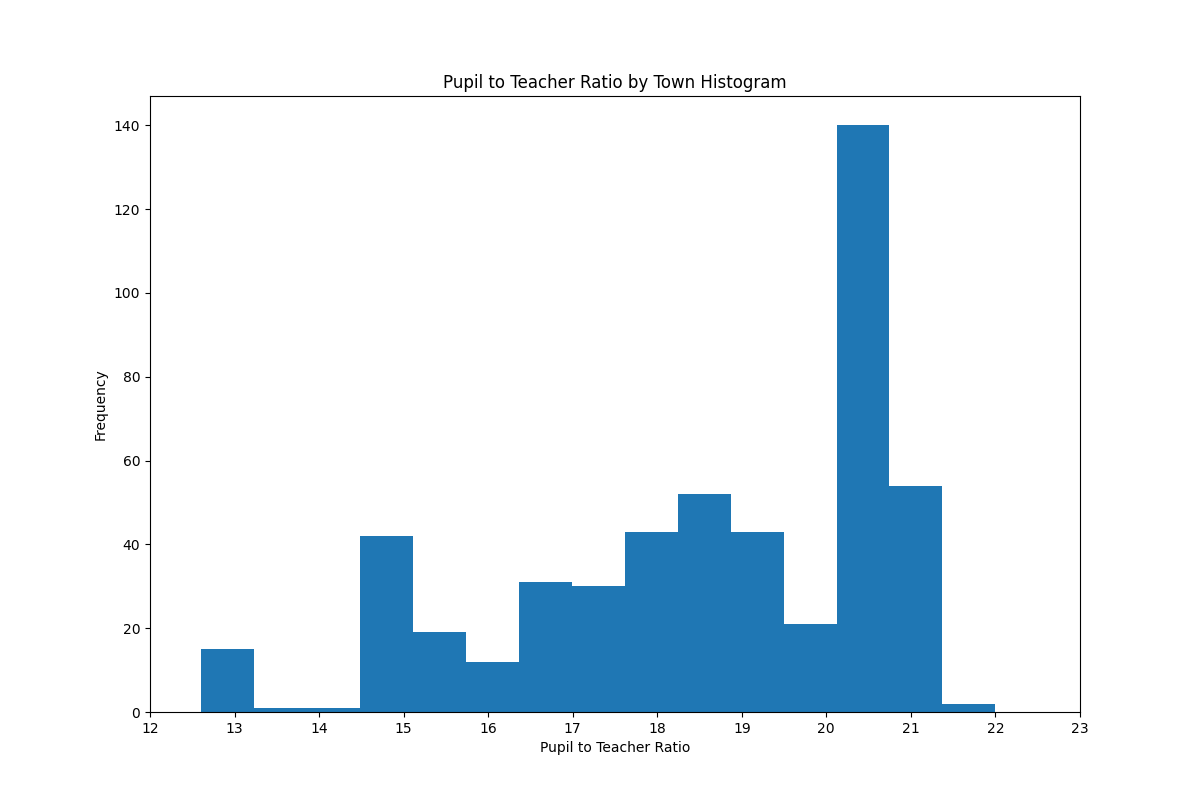

In [10]:
df_hist=boston_df['PTRATIO']

df_hist.plot(kind = 'hist',
             figsize = (12, 8),
             xticks = [12,13,14,15,16,17,18,19,20,21,22,23],
             bins = 15)

plt.title('Pupil to Teacher Ratio by Town Histogram')
plt.ylabel('Frequency')
plt.xlabel('Pupil to Teacher Ratio')
plt.show()

### As we can see, the average teacher is in charge of around 20 to 21 students.

# Task 5 - Use the appropriate tests to answer the questions provided.

#### Is there a significant difference in median value of houses bounded by the Charles river or not?

$Hypothesis$

*   Ho= There is no difference in median value of houses bounded by the Charles River.
*   H1= There is a difference in median value of houses bounded by the Charles River.

In [11]:
a= boston_df['MEDV']
b= boston_df['CHAS']
scipy.stats.levene(a,b,center = 'mean')

# P-value indicates different variance.

LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

In [12]:
scipy.stats.ttest_ind(a,b,equal_var=False)

Ttest_indResult(statistic=54.9210289745203, pvalue=2.752650575837329e-215)

**Conclusion**: Since the p-value for the T-test is below the significance value of 0.05 we can reject the null hypothesis and conclude that there is a statistical difference in the median value of houses bounded by the Charles River and those that aren't.

#### Is there a difference in Median values of houses for each proportion of owner occupied units built prior to 1940?

$Hypothesis$

*   Ho= There is no difference in median value of houses for each proportion of owner occupied units built to 1940.
*   H1= There is a difference in median value of houses for each proportion of owner occupied units built to 1940.

In [13]:
c = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
d = boston_df[boston_df['age_group'] == 'Between 35 and 70 years']['MEDV']
e = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

scipy.stats.levene(c,d,e, center = 'mean')

# P-value indicates equal variance.

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [14]:
f_statistic, p_value = scipy.stats.f_oneway(c, d, e)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion**: Using ANOVA test we see a p-value below the significance level. We will reject the null hypothesis since we can conclude that at least one of the means is not the same, therefore we can state that there is a statistical difference in median value of houses for each proportion of owner occupied units built to 1940.

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?


$Hypothesis$

*   Ho= There is no relationship between Nitric Oxide Concentrations and proportion of non-retail business acres per town.
*   H1= There is a relationship between Nitric Oxide Concentrations and proportion of non-retail business acres per town.

In [15]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209189, 7.913361061211254e-98)

**Conclusion:**: We reject the Null hypothesis and conclude that there exists a relationship between Nitric Oxide Concentrations and proportion of non-retail business acres per town.

#### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

**IS THERE A CORRELATION BETWEEN THE DISTANCE TO THE EMPLOYMENT CENTRES AND MEDIAN VALUE OF OCCUPIED HOMES?**

In [16]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           1.21e-08
Time:                        17:34:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**: R-square is 0.062, R will be √0.001, correlation coefficient is 0.24, suggesting a weak correlation between weighted distance to the five Boston employment centres on the median value of owner occupied homes.